In [1]:
import torch # PyTorch
import torch.nn as nn # Neural Network package
import torch.optim as optim # Optimization package
from torchvision import datasets, transforms # Datasets and transformations
from torch.utils.data import DataLoader # Dataloader
import matplotlib.pyplot as plt # Plotting
import numpy as np # Numpy


In [2]:
# Define transformations (resize, convert to tensor, normalize)
transform = transforms.Compose([ # Compose multiple transformations
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize (optional) 
])

# Load dataset
dataset_path = r"C:\Users\USER\Desktop\SafeStreet\dataset"  # Update with correct path
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform) # Load dataset

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Check class labels
print("Class labels:", train_dataset.classes)  # ['apples', 'oranges']


Class labels: ['Not a Road', 'Road']


In [3]:
class CNN(nn.Module): # Convolutional Neural Network
    def __init__(self): # Constructor
        super(CNN, self).__init__() # Superclass constructor
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1) # Convolutional layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) 
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2) # Max pooling layer
        self.fc1 = nn.Linear(64 * 16 * 16, 128) # Fully connected
        self.fc2 = nn.Linear(128, 1)  # Output = 1 for binary classification
        self.sigmoid = nn.Sigmoid() # Sigmoid activation function

    def forward(self, x): # Forward pass
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x))) # ReLU activation
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 16)  # Flatten
        x = nn.ReLU()(self.fc1(x)) # Fully connected layer
        x = self.fc2(x)
        x = self.sigmoid(x)  # Sigmoid for binary classification
        return x


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [5]:
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)
        labels = labels.view(-1, 1)  # Reshape for binary classification

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training complete!")


Epoch [1/10], Loss: 0.5826
Epoch [2/10], Loss: 0.2546
Epoch [3/10], Loss: 0.2315
Epoch [4/10], Loss: 0.1318
Epoch [5/10], Loss: 0.0609
Epoch [6/10], Loss: 0.0732
Epoch [7/10], Loss: 0.0756
Epoch [8/10], Loss: 0.0775
Epoch [9/10], Loss: 0.0861
Epoch [10/10], Loss: 0.0108
Training complete!


In [6]:
# Save the trained model
model_path = "road.pth" # Update with correct path
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}") # Model saved to apple_orange_cnn.pth


Model saved to road.pth


In [7]:
# Load model
model = CNN().to(device)  # Initialize model
model.load_state_dict(torch.load("road.pth"))
model.eval()  # Set to evaluation mode
print("Model loaded successfully!")


Model loaded successfully!


RuntimeError: Given groups=1, weight of size [16, 3, 3, 3], expected input[1, 4, 128, 128] to have 3 channels, but got 4 channels instead

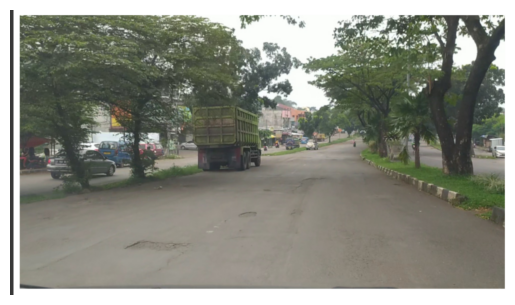

In [10]:

import PIL.Image as Image # Image module
def predict_image(image_path): # Function to predict image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)  # Preprocess image
    with torch.no_grad():
        output = model(image)
    prediction = "Not a Road" if output.item() < 0.5 else "Road"
    return prediction
# Example usage
test_image_path = r"C:\Users\USER\Pictures\Screenshots\Screenshot 2025-03-27 150439.png" # Change to any test image
plt.imshow(Image.open(test_image_path))
plt.axis("off")
plt.title(f"Predicted: {predict_image(test_image_path)}")
plt.show()
